In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time

In [8]:
mnist=tf.keras.datasets.mnist
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
X_train=tf.keras.utils.normalize(X_train,axis=1)
X_test=tf.keras.utils.normalize(X_test,axis=1)


NameError: name 'tf' is not defined

In [7]:
import time
start_time_nn = time.time()
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=5)
end_time_nn = time.time()
nn_train_time = end_time_nn-start_time_nn
model.save('Handwrittendigit.model')


Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2583 - accuracy: 0.9248
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1055 - accuracy: 0.9673
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0721 - accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0537 - accuracy: 0.9827
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0400 - accuracy: 0.9872
INFO:tensorflow:Assets written to: Handwrittendigit.model\assets


INFO:tensorflow:Assets written to: Handwrittendigit.model\assets


In [ ]:
model=tf.keras.models.load_model('Handwrittendigit.model')
loss,accuracy = model.evaluate(X_test,Y_test)

print("sequential NN :",loss,accuracy)

313/313 [==============================] - 0s 865us/step - loss: 0.0860 - accuracy: 0.9751
sequential NN : 0.08604363352060318 0.9750999808311462


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

In [11]:
lr_model = LogisticRegression(max_iter=1000)
epochs=5
lr_accuracies=[]
lr_model = LogisticRegression(max_iter=1000, C=0.01, penalty='l2')
lr_model.fit(X_train.reshape(-1, 28 * 28), Y_train)
lr_strt_time=time.time()
for epoch in range(epochs): 
    lr_model.fit(X_train.reshape(-1, 28 * 28), Y_train)
    lr_predictions = lr_model.predict(X_test.reshape(-1, 28 * 28))
    lr_accuracy = accuracy_score(Y_test, lr_predictions)
    lr_accuracies.append(lr_accuracy)
lr_end_time=time.time()
print("Logistic Regression Accuracies:")
for epoch, acc in enumerate(lr_accuracies):
    print(f"Epoch {epoch + 1}: Accuracy = {acc:.4f}")

lr_training_time=lr_end_time-lr_strt_time  

Logistic Regression Accuracies:
Epoch 1: Accuracy = 0.9097
Epoch 2: Accuracy = 0.9097
Epoch 3: Accuracy = 0.9097
Epoch 4: Accuracy = 0.9097
Epoch 5: Accuracy = 0.9097


In [6]:
import tensorflow as tf
import time
mnist=tf.keras.datasets.mnist
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
X_train=tf.keras.utils.normalize(X_train,axis=1)
X_test=tf.keras.utils.normalize(X_test,axis=1)
start_time_cnn = time.time()
cnn_model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn_model.fit(X_train,Y_train,epochs=5,batch_size=32,validation_split=0.1)
cnn_accuracy = cnn_model.evaluate(X_test, Y_test, verbose=0)[1]
end_time_cnn = time.time()
cnn_training_time = end_time_cnn - start_time_cnn
print("CNN Accuracy:", cnn_accuracy)
cnn_model.save('Handwrittendigit.model')

Epoch 1/5
1688/1688 [==============================] - 36s 21ms/step - loss: 0.2088 - accuracy: 0.9390 - val_loss: 0.0794 - val_accuracy: 0.9800
Epoch 2/5
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0702 - accuracy: 0.9787 - val_loss: 0.0639 - val_accuracy: 0.9827
Epoch 3/5
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0469 - accuracy: 0.9850 - val_loss: 0.0606 - val_accuracy: 0.9825
Epoch 4/5
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.0571 - val_accuracy: 0.9855
Epoch 5/5
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0224 - accuracy: 0.9927 - val_loss: 0.0661 - val_accuracy: 0.9843
CNN Accuracy: 0.9800999760627747
INFO:tensorflow:Assets written to: Handwrittendigit.model\assets


INFO:tensorflow:Assets written to: Handwrittendigit.model\assets


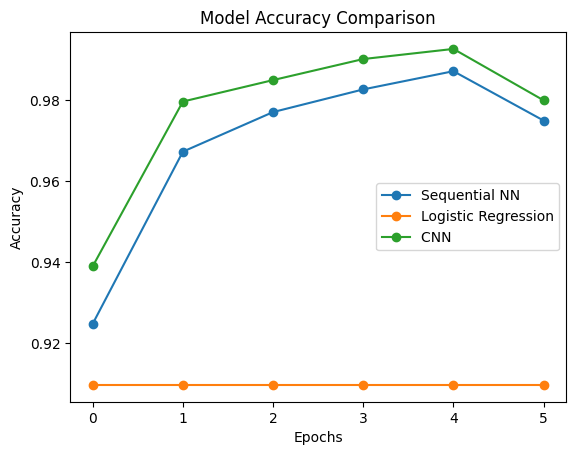

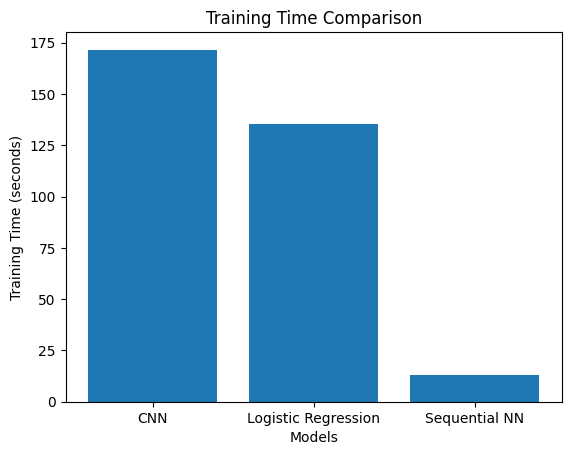

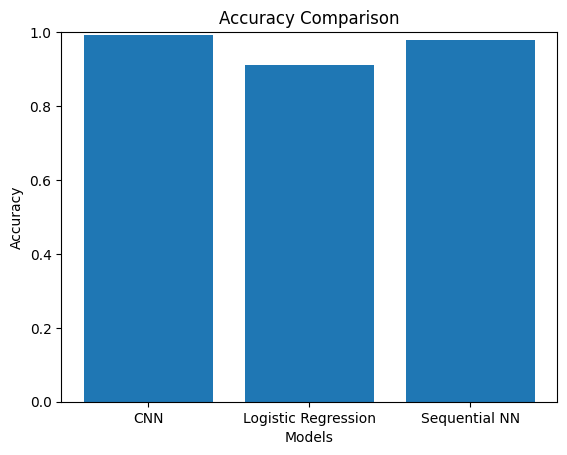

In [12]:
import matplotlib.pyplot as plt
epochs=6
accuracy = [0.9248, 0.96732, 0.9771, 0.9827, 0.9872,0.9750] 
lr_accuracies = [0.9097, 0.9097, 0.9097, 0.9097, 0.9097,0.9097] 
cnn_accuracy = [0.9390,0.9797,0.9850,0.9902,0.9927,0.9800]
plt.plot(range(0, epochs, 1), accuracy, label='Sequential NN', marker='o')
plt.plot(range(0, epochs, 1), lr_accuracies, label='Logistic Regression', marker='o')
plt.plot(range(0, epochs, 1), cnn_accuracy, label='CNN ', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Comparison')
plt.show()
models = ['CNN', 'Logistic Regression', 'Sequential NN']
training_times = [cnn_training_time, lr_training_time, nn_train_time]

plt.bar(models, training_times)
plt.xlabel('Models')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison')
plt.show()
models = ['CNN', 'Logistic Regression', 'Sequential NN']
accuracies = [0.9929, 0.9097, 0.9774]

plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.ylim(0, 1)  
plt.show()


In [16]:
import tensorflow as tf
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


mnist = tf.keras.datasets.mnist
(_, _), (X_test, Y_test) = mnist.load_data()
X_test = tf.keras.utils.normalize(X_test, axis=1)


cnn_model = tf.keras.models.load_model('Handwrittendigit.model')


lr_model = LogisticRegression(max_iter=1000, C=0.01, penalty='l2')
lr_model.fit(X_train.reshape(-1, 28 * 28), Y_train)


model = tf.keras.models.load_model('Handwrittendigit.model')

# Evaluate the CNN model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, Y_test)
print("CNN Accuracy:", cnn_accuracy)

# Use the CNN model to predict class probabilities
cnn_class_probabilities = cnn_model.predict(X_test)

# Convert class probabilities to class labels
cnn_y_pred = np.argmax(cnn_class_probabilities, axis=-1)

# Calculate and print the classification report for CNN
cnn_report = classification_report(Y_test, cnn_y_pred)
print("Classification Report for CNN:\n", cnn_report)

# Use the Logistic Regression model to predict class labels
lr_y_pred = lr_model.predict(X_test.reshape(-1, 28 * 28))

# Calculate and print the classification report for Logistic Regression
lr_report = classification_report(Y_test, lr_y_pred)
print("Classification Report for Logistic Regression:\n", lr_report)




313/313 [==============================] - 0s 828us/step - loss: 0.0878 - accuracy: 0.9756
CNN Accuracy: 0.975600004196167
313/313 [==============================] - 0s 741us/step
Classification Report for CNN:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.97      0.97       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Classification Report for Log

In [15]:
# Load the Sequential NN model
print("Loading Sequential NN model...")
model = tf.keras.models.load_model('Handwrittendigit.model')
print("Sequential NN model loaded.")

# Use the Sequential NN model to predict class probabilities
print("Predicting with Sequential NN model...")
nn_class_probabilities = model.predict(X_test)
print("Predictions made with Sequential NN model.")

# Convert class probabilities to class labels
nn_y_pred = np.argmax(nn_class_probabilities, axis=-1)

# Calculate and print the classification report for Sequential NN
nn_report = classification_report(Y_test, nn_y_pred)
print("Classification Report for Sequential NN:\n", nn_report)


Loading Sequential NN model...
Sequential NN model loaded.
Predicting with Sequential NN model...
313/313 [==============================] - 0s 742us/step
Predictions made with Sequential NN model.
Classification Report for Sequential NN:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.99      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.97      0.97       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [39]:
import pandas as pd

# Create a custom table
data = {
    'Model': ['CNN', 'Logistic Regression', 'Sequential NN'],
    'Accuracy': [cnn_metrics['accuracy'], lr_metrics['accuracy'], nn_metrics['accuracy']],
    'Precision (weighted)': [cnn_metrics['weighted avg']['precision'], lr_metrics['weighted avg']['precision'], nn_metrics['weighted avg']['precision']],
    'Recall (weighted)': [cnn_metrics['weighted avg']['recall'], lr_metrics['weighted avg']['recall'], nn_metrics['weighted avg']['recall']],
    'F1-Score (weighted)': [cnn_metrics['weighted avg']['f1-score'], lr_metrics['weighted avg']['f1-score'], nn_metrics['weighted avg']['f1-score']]
    
    
}

# Create a Pandas DataFrame
df = pd.DataFrame(data)

# Set options to display F1-score on the same line
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', 1000)

# Print the DataFrame
print(df)




                 Model  Accuracy  Precision (weighted)  Recall (weighted)  F1-Score (weighted)
0                  CNN    0.9756              0.975658             0.9756             0.975595
1  Logistic Regression    0.9097              0.909653             0.9097             0.909404
2        Sequential NN    0.9756              0.975658             0.9756             0.975595


In [38]:
import time
import pandas as pd
from tabulate import tabulate as tab
import tensorflow as tf
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load the MNIST test dataset
mnist = tf.keras.datasets.mnist
(_, _), (X_test, Y_test) = mnist.load_data()
X_test = tf.keras.utils.normalize(X_test, axis=1)

# Load the trained models
cnn_model = tf.keras.models.load_model('Handwrittendigit.model')

# Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, C=0.01, penalty='l2')
lr_strt_time = time.time()
lr_model.fit(X_train.reshape(-1, 28 * 28), Y_train)
lr_end_time = time.time()
lr_training_time = lr_end_time - lr_strt_time

# Sequential NN model
nn_model = tf.keras.models.load_model('Handwrittendigit.model')

# Evaluate the CNN model
cnn_strt_time = time.time()
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, Y_test, verbose=0)
cnn_end_time = time.time()
cnn_training_time = cnn_end_time - cnn_strt_time

# Use the CNN model to predict class probabilities
cnn_class_probabilities = cnn_model.predict(X_test)
cnn_y_pred = np.argmax(cnn_class_probabilities, axis=-1)

# Calculate and print the classification report for CNN
cnn_report = classification_report(Y_test, cnn_y_pred, output_dict=True)

# Use the Logistic Regression model to predict class labels
lr_strt_time = time.time()
lr_y_pred = lr_model.predict(X_test.reshape(-1, 28 * 28))
lr_end_time = time.time()
lr_training_time = lr_end_time - lr_strt_time

# Calculate and print the classification report for Logistic Regression
lr_report = classification_report(Y_test, lr_y_pred, output_dict=True)

# Use the Sequential NN model to predict class probabilities
nn_strt_time = time.time()
nn_class_probabilities = nn_model.predict(X_test)
nn_end_time = time.time()
nn_training_time = nn_end_time - nn_strt_time

# Convert class probabilities to class labels
nn_y_pred = np.argmax(nn_class_probabilities, axis=-1)

# Calculate and print the classification report for Sequential NN
nn_report = classification_report(Y_test, nn_y_pred, output_dict=True)

# Print the results in a table
headers = ["Model", "Accuracy", "Training Time", "Precision", "Recall", "F1-Score"]
data = [
    ["CNN", cnn_accuracy, cnn_training_time, cnn_report["weighted avg"]["precision"], cnn_report["weighted avg"]["recall"], cnn_report["weighted avg"]["f1-score"]],
    ["Logistic Regression", accuracy_score(Y_test, lr_y_pred), lr_training_time, lr_report["weighted avg"]["precision"], lr_report["weighted avg"]["recall"], lr_report["weighted avg"]["f1-score"]],
    ["Sequential NN", accuracy_score(Y_test, nn_y_pred), nn_training_time, nn_report["weighted avg"]["precision"], nn_report["weighted avg"]["recall"], nn_report["weighted avg"]["f1-score"]],
]

print(tab(data, headers=headers, tablefmt="pretty"))




313/313 [==============================] - 0s 761us/step
+---------------------+-------------------+---------------------+--------------------+--------+--------------------+
|        Model        |     Accuracy      |    Training Time    |     Precision      | Recall |      F1-Score      |
+---------------------+-------------------+---------------------+--------------------+--------+--------------------+
|         CNN         | 0.975600004196167 | 0.35570669174194336 | 0.9756579396177605 | 0.9756 | 0.9755953174744931 |
| Logistic Regression |      0.9097       | 0.03300762176513672 | 0.9096526244758508 | 0.9097 | 0.9094035304712735 |
|    Sequential NN    |      0.9756       | 0.40528082847595215 | 0.9756579396177605 | 0.9756 | 0.9755953174744931 |
+---------------------+-------------------+---------------------+--------------------+--------+--------------------+


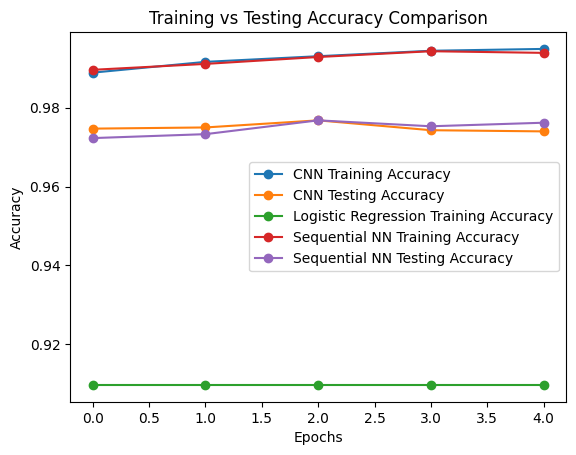

In [40]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tabulate import tabulate

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train, X_test = tf.keras.utils.normalize(X_train, axis=1), tf.keras.utils.normalize(X_test, axis=1)

# Load the trained models
cnn_model = tf.keras.models.load_model('Handwrittendigit.model')

# Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, C=0.01, penalty='l2')
lr_model.fit(X_train.reshape(-1, 28 * 28), Y_train)

# Sequential NN model
nn_model = tf.keras.models.load_model('Handwrittendigit.model')

# Training and evaluation for CNN
cnn_history = cnn_model.fit(X_train, Y_train, epochs=5, validation_data=(X_test, Y_test), verbose=0)
cnn_accuracy = cnn_model.evaluate(X_test, Y_test, verbose=0)[1]

# Training for Logistic Regression
lr_history = []
lr_accuracies = []
lr_strt_time = time.time()
for epoch in range(5):
    lr_model.fit(X_train.reshape(-1, 28 * 28), Y_train)
    lr_predictions = lr_model.predict(X_test.reshape(-1, 28 * 28))
    lr_accuracy = accuracy_score(Y_test, lr_predictions)
    lr_accuracies.append(lr_accuracy)
    lr_history.append(lr_model)

lr_end_time = time.time()
lr_training_time = lr_end_time - lr_strt_time

# Training and evaluation for Sequential NN
nn_history = nn_model.fit(X_train, Y_train, epochs=5, validation_data=(X_test, Y_test), verbose=0)
nn_accuracy = nn_model.evaluate(X_test, Y_test, verbose=0)[1]

# Plot training vs testing accuracy
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy', marker='o')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Testing Accuracy', marker='o')
plt.plot(lr_accuracies, label='Logistic Regression Training Accuracy', marker='o')
plt.plot(nn_history.history['accuracy'], label='Sequential NN Training Accuracy', marker='o')
plt.plot(nn_history.history['val_accuracy'], label='Sequential NN Testing Accuracy', marker='o')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Testing Accuracy Comparison')
plt.show()
